In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import os
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier


In [ ]:
##code from Harry to run PCA
path = '/content/drive/MyDrive/Group2Module2_CSS844/processed_files/'
folder = os.listdir(path)

n_components = 30
files = []
all_xs, all_ys, all_zs = [], [], []

for file in os.listdir(path):
    files.append(file.replace('.npy', ''))   
    arr = np.load(os.path.join(path, file)) 
    all_xs.append(arr[:, :, 0].mean(axis=0))
    all_ys.append(arr[:, :, 1].mean(axis=0))
    all_zs.append(arr[:, :, 2].mean(axis=0))

all_xs = np.vstack(all_xs)
all_ys = np.vstack(all_ys)
all_zs = np.vstack(all_zs)

print(f"Fitting PCA with {n_components} componenets in each dim")
x_pca = PCA(n_components=n_components, random_state=42).fit(all_xs) #changed fit_transform to fit in this and next 2 lines
y_pca = PCA(n_components=n_components, random_state=42).fit(all_ys)
z_pca = PCA(n_components=n_components, random_state=42).fit(all_zs)

#plot_pca = np.concatenate((x_pca, y_pca, z_pca), axis=1)
#^ removed this line from Harry's code, as with "fit" it gives error "zero-dimensional arrays cannot be concatenated"
#and writing it as "plot_pca = np.array([x_pca, y_pca, z_pca])" makes plot_pca not have attributes needed below


Fitting PCA with 30 componenets in each dim


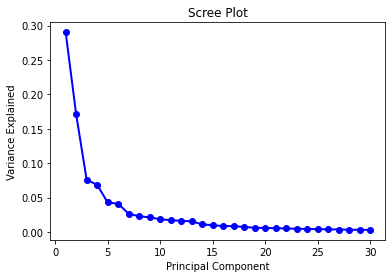

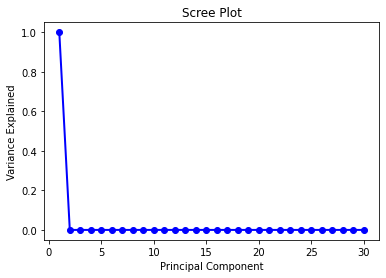

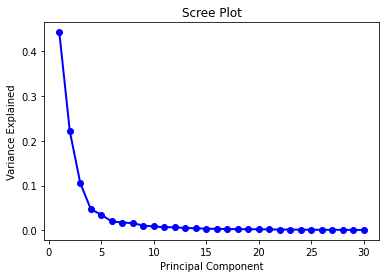

In [ ]:
##scree plots (https://www.statology.org/scree-plot-python/)
PC_values = np.arange(x_pca.n_components_) + 1
plt.plot(PC_values, x_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

PC_values = np.arange(y_pca.n_components_) + 1
plt.plot(PC_values, y_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

PC_values = np.arange(z_pca.n_components_) + 1
plt.plot(PC_values, z_pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Coefficients: 
 [[-4.02662277 -1.35173913 29.62371082 19.10770159 -5.11336025 -4.08207805]]
Mean squared error: 543910.94
Coefficient of determination (R^2): 0.04


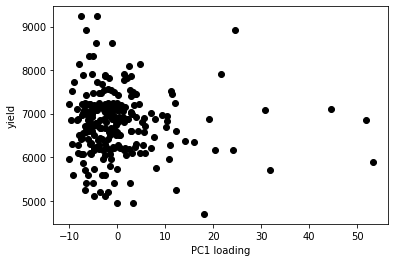

In [ ]:
##reading in training and test data

train_pca = read_csv("/content/drive/MyDrive/Group2Module2_CSS844/train_pca.csv") 
test_pca = read_csv("/content/drive/MyDrive/Group2Module2_CSS844/test_pca.csv")


##subset dataframes to have just first 6 PCs (columns 0:5) 
#other columns of interest: plot (90), plot_num (91), yield (92)
columns_list_x = [0,1,2,3,4,5]
columns_list_y = [92]
train_pca_x = train_pca.iloc[:, columns_list_x]
test_pca_x = test_pca.iloc[:, columns_list_x]
train_pca_y = train_pca.iloc[:, columns_list_y]
test_pca_y = test_pca.iloc[:, columns_list_y]
#train_pca_6.head (to confirm that the correct data is included. looks like it is)

##run linear regression (modelled off https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#)

#create linear regression object
regr = linear_model.LinearRegression()

#train the model using the training sets
regr.fit(train_pca_x, train_pca_y)

#make predictions using the testing set
pred_values = regr.predict(test_pca_x)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_pca_y, pred_values))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(test_pca_y, pred_values))

#look at the PC1 loadings from column 0 of train_pca.csv and plot it against the yield from train_pca.csv
pc1 = train_pca.iloc[:, 0]
plt.scatter(pc1, train_pca_y, color="black")
plt.xlabel("PC1 loading")
plt.ylabel("yield")
plt.show()
#code to add labels from: https://stackoverflow.com/questions/42223587/plt-scatter-how-to-add-title-and-xlabel-and-ylabel


In [ ]:

##subset dataframes to have PCs from each dimension
#other columns of interest: plot (90), plot_num (91), yield (92)
columns_list_x = [0,1,2,3,4,29,60,61,62,63,64]
columns_list_y = [92]
train_pca_x = train_pca.iloc[:, columns_list_x]
test_pca_x = test_pca.iloc[:, columns_list_x]
train_pca_y = train_pca.iloc[:, columns_list_y]
test_pca_y = test_pca.iloc[:, columns_list_y]
#train_pca_6.head (to confirm that the correct data is included. looks like it is)

##run linear regression (modelled off https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#)

#create linear regression object
regr = linear_model.LinearRegression()

#train the model using the training sets
regr.fit(train_pca_x, train_pca_y)

#make predictions using the testing set
pred_values = regr.predict(test_pca_x)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_pca_y, pred_values))
# The mean squared error
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(test_pca_y, pred_values))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(test_pca_y, pred_values))


Coefficients: 
 [[-11.22723998  16.36767602  19.17952624  21.47904576  -6.89976361
  -12.03719011  -0.15740297  -4.40365261   4.45183257   3.87394519
    9.63600076]]
Mean squared error: 516697.62
Mean absolute error: 582.37
Coefficient of determination (R^2): 0.09
